In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib import patches
import mplhep as hep
import os
from tqdm import tqdm
import ipywidgets as widget
import xsec
import itertools

Welcome to JupyROOT 6.28/00


C++ methods for defining the event weights in MC. The kernel needs to be restarted to test a new weight definition.

In [2]:
ROOT.gInterpreter.Declare("""
float compute_weight( float norm, float triggerXSF, float triggerSF, float pileupWeight, float pileupJetIDWeight, float lepIdSF, float EGammaGsfSF, float isoSF, float L1NonPrefiringProb_CommonCalc, float MCWeight_MultiLepCalc, float btagDeepJetWeight, float btagDeepJet2DWeight_HTnj ){
    return norm * triggerXSF * triggerSF * pileupWeight * pileupJetIDWeight * lepIdSF * EGammaGsfSF * isoSF * L1NonPrefiringProb_CommonCalc * ( MCWeight_MultiLepCalc / abs( MCWeight_MultiLepCalc ) ) * btagDeepJetWeight * btagDeepJet2DWeight_HTnj;
}
""")

True

In [3]:
ROOT.gInterpreter.Declare("""
float compute_weight_ttbar( float norm, float triggerXSF, float triggerSF, float pileupWeight, float pileupJetIDWeight, float topPtWeight13TeV, float lepIdSF, float EGammaGsfSF, float isoSF, float L1NonPrefiringProb_CommonCalc, float MCWeight_MultiLepCalc, float btagDeepJetWeight, float btagDeepJet2DWeight_HTnj ){
    return norm * triggerXSF * triggerSF * pileupWeight * pileupJetIDWeight * topPtWeight13TeV * lepIdSF * EGammaGsfSF * isoSF * L1NonPrefiringProb_CommonCalc * ( MCWeight_MultiLepCalc / abs( MCWeight_MultiLepCalc ) ) * btagDeepJetWeight * btagDeepJet2DWeight_HTnj;
}
""")

True

In [4]:
era = "2018"
rPath = "root://brux30.hep.brown.edu:1094//store/user/dali/"
rDir = rPath + "FWLJMET106XUL_singleLep{}UL_RunIISummer20_3t_step2_standard/nominal/".format( era )
nTree = "ljmet"
fDATA = [
    #"SingleElectron_hadd.root",
    "EGamma_hadd.root",
    "SingleMuon_hadd.root"
]
fSIG = [
    "TTTJ_TuneCP5_13TeV-madgraph-pythia8_hadd.root",
    "TTTW_TuneCP5_13TeV-madgraph-pythia8_hadd.root"
]
fBKG = {
    "TTTT": [
        #"TTTT_TuneCP5_13TeV-amcatnlo-pythia8_hadd.root",
        "TTTT_TuneCP5_13TeV-amcatnlo-pythia8_1_hadd.root",
        "TTTT_TuneCP5_13TeV-amcatnlo-pythia8_2_hadd.root",
        "TTTT_TuneCP5_13TeV-amcatnlo-pythia8_3_hadd.root",
    ],
    "TTH": [
        "ttHTobb_M125_TuneCP5_13TeV-powheg-pythia8_hadd.root",
        "ttHToNonbb_M125_TuneCP5_13TeV-powheg-pythia8_hadd.root",
    ],
    "TOP": [
        "TTHH_TuneCP5_13TeV-madgraph-pythia8_hadd.root",
        "TTWH_TuneCP5_13TeV-madgraph-pythia8_hadd.root",
        "TTWW_TuneCP5_13TeV-madgraph-pythia8_hadd.root",
        "TTWZ_TuneCP5_13TeV-madgraph-pythia8_hadd.root",
        "TTZH_TuneCP5_13TeV-madgraph-pythia8_hadd.root",
        "TTZZ_TuneCP5_13TeV-madgraph-pythia8_hadd.root",
        "TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_hadd.root",
        "TTWJetsToQQ_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_hadd.root", 
        "TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_hadd.root",
        "TTZToLL_M-1to10_TuneCP5_13TeV-amcatnlo-pythia8_hadd.root",
    ],
    "ST": [
        "ST_s-channel_4f_leptonDecays_TuneCP5_13TeV-amcatnlo-pythia8_hadd.root",
        "ST_t-channel_top_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8_hadd.root",
        "ST_t-channel_antitop_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8_hadd.root",
        "ST_tW_top_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8_hadd.root",
        "ST_tW_antitop_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8_hadd.root",
    ],
    "EWK": [
        "WW_TuneCP5_13TeV-pythia8_hadd.root",
        "WZ_TuneCP5_13TeV-pythia8_hadd.root",
        "ZZ_TuneCP5_13TeV-pythia8_hadd.root",
        "DYJetsToLL_M-50_HT-200to400_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8_hadd.root",
        "DYJetsToLL_M-50_HT-400to600_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8_hadd.root",
        "DYJetsToLL_M-50_HT-600to800_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8_hadd.root",
        "DYJetsToLL_M-50_HT-800to1200_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8_hadd.root",
        "DYJetsToLL_M-50_HT-1200to2500_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8_hadd.root",
        "DYJetsToLL_M-50_HT-2500toInf_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8_hadd.root",
        "WJetsToLNu_HT-200To400_TuneCP5_13TeV-madgraphMLM-pythia8_hadd.root",
        "WJetsToLNu_HT-400To600_TuneCP5_13TeV-madgraphMLM-pythia8_hadd.root",
        "WJetsToLNu_HT-600To800_TuneCP5_13TeV-madgraphMLM-pythia8_hadd.root",
        "WJetsToLNu_HT-800To1200_TuneCP5_13TeV-madgraphMLM-pythia8_hadd.root",
        "WJetsToLNu_HT-1200To2500_TuneCP5_13TeV-madgraphMLM-pythia8_hadd.root",
        "WJetsToLNu_HT-2500ToInf_TuneCP5_13TeV-madgraphMLM-pythia8_hadd.root",
    ],
    "QCD": [
        "QCD_HT200to300_TuneCP5_PSWeights_13TeV-madgraph-pythia8_hadd.root",
        "QCD_HT300to500_TuneCP5_PSWeights_13TeV-madgraph-pythia8_hadd.root",
        "QCD_HT500to700_TuneCP5_PSWeights_13TeV-madgraph-pythia8_hadd.root",
        "QCD_HT700to1000_TuneCP5_PSWeights_13TeV-madgraph-pythia8_hadd.root",
        "QCD_HT1000to1500_TuneCP5_PSWeights_13TeV-madgraph-pythia8_hadd.root",
        "QCD_HT1500to2000_TuneCP5_PSWeights_13TeV-madgraph-pythia8_hadd.root",
        "QCD_HT2000toInf_TuneCP5_PSWeights_13TeV-madgraph-pythia8_hadd.root",
    ],   
    "TTBAR": [
        "TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8_tt1b_hadd.root",
        "TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8_tt2b_hadd.root",
        "TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8_ttbb_hadd.root",
        "TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8_ttcc_hadd.root",
        "TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8_ttjj_hadd.root",
        "TTToHadronic_TuneCP5_13TeV-powheg-pythia8_tt1b_hadd.root",
        "TTToHadronic_TuneCP5_13TeV-powheg-pythia8_tt2b_hadd.root",
        "TTToHadronic_TuneCP5_13TeV-powheg-pythia8_ttbb_hadd.root",
        "TTToHadronic_TuneCP5_13TeV-powheg-pythia8_ttcc_hadd.root",
        "TTToHadronic_TuneCP5_13TeV-powheg-pythia8_ttjj_hadd.root",
        "TTToSemiLepton_HT500Njet9_TuneCP5_13TeV-powheg-pythia8_tt1b_hadd.root",
        "TTToSemiLepton_HT500Njet9_TuneCP5_13TeV-powheg-pythia8_tt2b_hadd.root",
        "TTToSemiLepton_HT500Njet9_TuneCP5_13TeV-powheg-pythia8_ttbb_hadd.root",
        "TTToSemiLepton_HT500Njet9_TuneCP5_13TeV-powheg-pythia8_ttcc_hadd.root",
        "TTToSemiLepton_HT500Njet9_TuneCP5_13TeV-powheg-pythia8_ttjj_hadd.root",
        "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_tt1b_hadd.root",
        "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_tt2b_hadd.root",
        "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttbb_hadd.root",
        "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttcc_hadd.root",
        "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_1_hadd.root",
        "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_2_hadd.root",
        "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_3_hadd.root",
        "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_4_hadd.root",
        "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_5_hadd.root",
        "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_6_hadd.root",
        "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_7_hadd.root",
        "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_8_hadd.root",
        "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_9_hadd.root",
        "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_10_hadd.root",
        "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT500Njet9_tt1b_hadd.root",
        "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT500Njet9_tt2b_hadd.root",
        "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT500Njet9_ttbb_hadd.root",
        "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT500Njet9_ttcc_hadd.root",
        "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT500Njet9_ttjj_hadd.root",
    ]
}

In [5]:
fBase = "DataPastTriggerX == 1 && MCPastTriggerX == 1 && minDR_lepJet > 0.2 && AK4HT > 350"
if era == "2018":
    fBase += " && ( ( isElectron == 1 && ( leptonEta_MultiLepCalc > -1.3 ||  ( leptonPhi_MultiLepCalc < -1.57 || leptonPhi_MultiLepCalc > -0.87 ) ) ) || isMuon == 1 )"
trigger = "1" if ( era == "2016APV" or era == "2016" ) else "triggerSF"
deepJet1D = "btagDeepJetWeight"
deepJet2D = "btagDeepJet2DWeight_HTnj"
variables = [
    "NJets_JetSubCalc",
    "NJetsCSV_JetSubCalc",
    "NresolvedTops1pFake",
    "AK4HT",
    "corr_met_MultiLepCalc",
    "corr_met_phi_MultiLepCalc",
    "leptonPhi_MultiLepCalc",
]
rDF = { "DATA": {}, "SIG": {}, "BKG": {} }
print( "Applying the selection: {}".format( fBase ) )
print( "Loading data:" )
for f in tqdm( fDATA ):
    rDF["DATA"][f] = ROOT.RDataFrame( nTree, rDir + f ).Filter( fBase ).AsNumpy( columns = variables )
print( "Loading signal:" )
for f in tqdm( fSIG ):
    rDF_ = ROOT.RDataFrame( nTree, rDir + f ).Filter( fBase ).Define( "weight", "compute_weight( {}, triggerXSF, {}, pileupWeight, pileupJetIDWeight, lepIdSF, EGammaGsfSF, isoSF, L1NonPrefiringProb_CommonCalc, MCWeight_MultiLepCalc, {}, {} )".format( xsec.norm[f], trigger, deepJet1D, deepJet2D ) )
    rDF["SIG"][f] = rDF_.AsNumpy( columns = variables + [ "weight" ] )
for g in fBKG:
    rDF["BKG"][g] = {}
    print( "Loading background group: " + g )
    for f in tqdm( fBKG[g] ):
        if g == "TTBAR":
            if "TTToSemiLepton" in f and "HT500" in f:
                rDF_ = ROOT.RDataFrame( nTree, rDir + f ).Filter( fBase + " && isHTgt500Njetge9 == 1" ).Define( "weight", "compute_weight_ttbar( {}, triggerXSF, {}, pileupWeight, pileupJetIDWeight, topPtWeight13TeV, lepIdSF, EGammaGsfSF, isoSF, L1NonPrefiringProb_CommonCalc, MCWeight_MultiLepCalc, {}, {} )".format( xsec.norm[f], trigger, deepJet1D, deepJet2D ) )
            elif "TTToSemiLepton" in f and "HT500" not in f:
                rDF_ = ROOT.RDataFrame( nTree, rDir + f ).Filter( fBase + " && isHTgt500Njetge9 == 0" ).Define( "weight", "compute_weight_ttbar( {}, triggerXSF, {}, pileupWeight, pileupJetIDWeight, topPtWeight13TeV, lepIdSF, EGammaGsfSF, isoSF, L1NonPrefiringProb_CommonCalc, MCWeight_MultiLepCalc, {}, {} )".format( xsec.norm[f], trigger, deepJet1D, deepJet2D ) )
            else:
                rDF_ = ROOT.RDataFrame( nTree, rDir + f ).Filter( fBase ).Define( "weight", "compute_weight_ttbar( {}, triggerXSF, {}, pileupWeight, pileupJetIDWeight, topPtWeight13TeV, lepIdSF, EGammaGsfSF, isoSF, L1NonPrefiringProb_CommonCalc, MCWeight_MultiLepCalc, {}, {} )".format( xsec.norm[f], trigger, deepJet1D, deepJet2D ) )
            rDF["BKG"][g][f] = rDF_.AsNumpy( columns = variables + [ "weight" ] )
        else:
            rDF_ = ROOT.RDataFrame( nTree, rDir + f ).Filter( fBase ).Define( "weight", "compute_weight( {}, triggerXSF, {}, pileupWeight, pileupJetIDWeight, lepIdSF, EGammaGsfSF, isoSF, L1NonPrefiringProb_CommonCalc, MCWeight_MultiLepCalc, {}, {} )".format( xsec.norm[f], trigger, deepJet1D, deepJet2D ) )
            rDF["BKG"][g][f] = rDF_.AsNumpy( columns = variables + [ "weight" ] )

Applying the selection: DataPastTriggerX == 1 && MCPastTriggerX == 1 && minDR_lepJet > 0.2 && AK4HT > 350 && ( ( isElectron == 1 && ( leptonEta_MultiLepCalc > -1.3 ||  ( leptonPhi_MultiLepCalc < -1.57 || leptonPhi_MultiLepCalc > -0.87 ) ) ) || isMuon == 1 )
Loading data:


100%|██████████| 2/2 [00:21<00:00, 10.83s/it]


Loading signal:


100%|██████████| 2/2 [00:06<00:00,  3.16s/it]


Loading background group: TTTT


100%|██████████| 3/3 [01:23<00:00, 27.72s/it]


Loading background group: TTH


100%|██████████| 2/2 [00:24<00:00, 12.02s/it]


Loading background group: TOP


100%|██████████| 10/10 [01:02<00:00,  6.24s/it]


Loading background group: ST


100%|██████████| 5/5 [00:15<00:00,  3.06s/it]


Loading background group: EWK


100%|██████████| 15/15 [01:28<00:00,  5.87s/it]


Loading background group: QCD


100%|██████████| 7/7 [00:09<00:00,  1.33s/it]


Loading background group: TTBAR


100%|██████████| 34/34 [07:49<00:00, 13.81s/it]


### Apply any selection

In [6]:
ops = {
    ">=": lambda x, y: x >= y,
    ">":  lambda x, y: x > y,
    "<":  lambda x, y: x < y,
    "<=": lambda x, y: x <= y,
    "==": lambda x, y: x == y
}

In [7]:
selection = {
    ( "NJets_JetSubCalc", ">=", 4, "$N_j\geq4$" ),
    #( "NJets_JetSubCalc", "<", 6, "$N_j<6$" ),
    ( "NJetsCSV_JetSubCalc", ">=", 2, "$N_b\geq2$" ),
    #( "NJetsCSV_JetSubCalc", "<", 4, "$N_b<4$" )
}

In [8]:
mask = { "DATA": {}, "SIG": {}, "BKG": {} }

print( "[INFO] Applying selection on data" )
for f in tqdm( rDF["DATA"] ):
    for selection_ in selection:
        mask["DATA"][f] = ops[selection_[1]]( rDF["DATA"][f][selection_[0]], selection_[2] )
print( "[INFO] Applying selection on signal" )
for f in tqdm( rDF["SIG"] ):
    for selection_ in selection:
        mask["SIG"][f] = ops[selection_[1]]( rDF["SIG"][f][selection_[0]], selection_[2] )
print( "[INFO] Applying selection on background" )
for g in tqdm( rDF["BKG"] ):
    mask["BKG"][g] = {}
    for f in rDF["BKG"][g]:
        for selection_ in selection:
            mask["BKG"][g][f] = ops[selection_[1]]( rDF["BKG"][g][f][selection_[0]], selection_[2] )

[INFO] Applying selection on data


100%|██████████| 2/2 [00:00<00:00, 197.80it/s]


[INFO] Applying selection on signal


100%|██████████| 2/2 [00:00<00:00, 1257.66it/s]


[INFO] Applying selection on background


100%|██████████| 7/7 [00:00<00:00, 26.75it/s]


### Calculate Statistical Uncertainty and Apply normalization weights

In [9]:
variable_plot = widget.Dropdown( options = sorted( variables ) )
variable_plot

Dropdown(options=('AK4HT', 'NJetsCSV_JetSubCalc', 'NJets_JetSubCalc', 'NresolvedTops1pFake', 'corr_met_MultiLe…

In [18]:
bins = np.linspace( 0, 1000, 51 )

hist = { "DATA": {}, "SIG": {}, "BKG": {} }
hist_norm = { "DATA": {}, "SIG": {}, "BKG": {} }

print( "[INFO] Binning data" )
for f in tqdm( rDF["DATA"] ):
    hist["DATA"][f] = np.histogram( rDF["DATA"][f][variable_plot.value][ mask["DATA"][f] ], bins = bins )
    hist_norm["DATA"][f] = np.histogram( rDF["DATA"][f][variable_plot.value][ mask["DATA"][f] ], bins = bins )
print( "[INFO] Binning signal" )
for f in tqdm( rDF["SIG"] ):
    hist["SIG"][f] = np.histogram( rDF["SIG"][f][variable_plot.value][ mask["SIG"][f] ], bins = bins )
    hist_norm["SIG"][f] = np.histogram( 
        rDF["SIG"][f][variable_plot.value][ mask["SIG"][f] ], 
        weights = rDF["SIG"][f]["weight"][ mask["SIG"][f] ],
        bins = bins )
print( "[INFO] Binning background" )
for g in tqdm( fBKG ):
    for f in fBKG[g]:
        if f == fBKG[g][0]:
            hist["BKG"][g] = list( np.histogram( rDF["BKG"][g][f][variable_plot.value][ mask["BKG"][g][f] ], bins = bins ) )
            hist_norm["BKG"][g] = list( np.histogram( 
                rDF["BKG"][g][f][variable_plot.value][ mask["BKG"][g][f] ],
                weights = rDF["BKG"][g][f]["weight"][ mask["BKG"][g][f] ],
                bins = bins ) )
        else:
            hist["BKG"][g][0] += np.histogram( rDF["BKG"][g][f][variable_plot.value][ mask["BKG"][g][f] ], bins = bins )[0]
            hist_norm["BKG"][g][0] += np.histogram( 
                rDF["BKG"][g][f][variable_plot.value][ mask["BKG"][g][f] ],
                weights = rDF["BKG"][g][f]["weight"][ mask["BKG"][g][f] ],
                bins = bins )[0]



[INFO] Binning data


100%|██████████| 2/2 [00:00<00:00,  6.79it/s]


[INFO] Binning signal


100%|██████████| 2/2 [00:00<00:00, 33.79it/s]


[INFO] Binning background


100%|██████████| 7/7 [00:10<00:00,  1.56s/it]


### Calculate data-to-MC ratio

In [19]:
data_yield_tot = 0
mc_yield_tot = 0
ratio = []
ratio_err_data = []
ratio_err_MC = []
for i in range( len( bins ) - 1 ):
    data_yield = hist["DATA"][fDATA[0]][0][i] + hist["DATA"][fDATA[1]][0][i]
    signal_yield = np.sum( [ hist_norm["SIG"][f][0][i] for f in hist_norm["SIG"] ] )
    signal_stat = np.sum( [ hist["SIG"][f][0][i] for f in hist["SIG"] ] )
    background_yield = 0
    background_stat = 0
    for g in hist["BKG"]:
        background_yield += hist_norm["BKG"][g][0][i]
        background_stat += hist["BKG"][g][0][i]
    mc_yield = signal_yield + background_yield
    mc_stat  = signal_stat + background_stat
    scale = 1 if mc_yield == 0 else np.sum( mc_stat ) / np.sum( mc_yield )
    if mc_yield == 0:
        ratio.append(1)
        ratio_err_data.append( 0 )
        ratio_err_MC.append( 0 )
    else:
        ratio.append( data_yield / mc_yield )
        ratio_err_data.append( np.sqrt( data_yield ) / data_yield )
        ratio_err_MC.append( np.sqrt( mc_stat ) / mc_stat )
    mc_yield_tot += mc_yield
    data_yield_tot += data_yield

### Plot Data and MC Agreement
First for combined lepton channels

In [20]:
colormap = {
    "TTTT": "royalblue",
    "TTH":  "darkturquoise",
    "TOP":  "aquamarine",
    "EWK":  "limegreen",
    "ST":   "green",
    "QCD":  "darkviolet",
    "TTBAR":"gold"
}

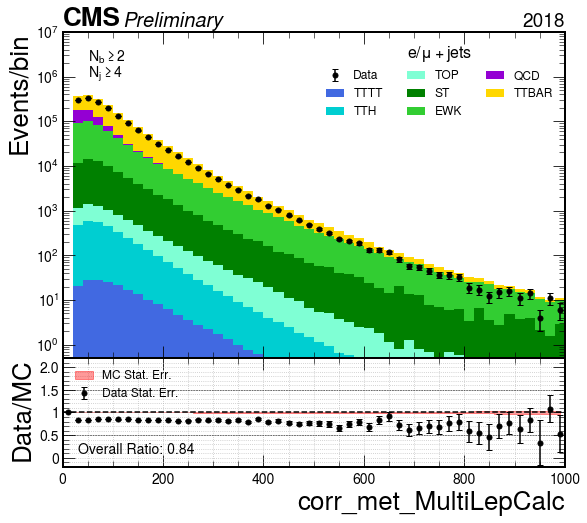

In [21]:
yscale = "log"
plt.style.use( hep.style.CMS )
fig, subplots = plt.subplots( 2, 1, gridspec_kw = { "height_ratios": [3,1], "hspace": 0 }, figsize = (9,8) )
hep.cms.text( "Preliminary", fontsize = 20, ax = subplots[0] )
hep.cms.lumitext( era, fontsize = 20, ax = subplots[0] )
subplots[0].errorbar( 
    0.5 * ( bins[1:] + bins[:-1] ), hist["DATA"][fDATA[0]][0] + hist["DATA"][fDATA[1]][0],
    yerr = np.sqrt( hist["DATA"][fDATA[0]][0] + hist["DATA"][fDATA[1]][0] ),
    ls = "", marker = "o", ms = 5, capsize = 3, color = "k", label = "Data"
)
bottom = np.zeros( len( bins ) - 1 )
for g in fBKG:
    subplots[0].bar(
        0.5 * ( bins[1:] + bins[:-1] ), hist_norm["BKG"][g][0], width = bins[:-1] - bins[1:], bottom = bottom, 
        align = "center", color = colormap[g], label = g
    )
    bottom += hist_norm["BKG"][g][0]

subplots[1].errorbar(
    0.5 * ( bins[1:] + bins[:-1] ), ratio, yerr = ratio_err_data,
    color = "k", ls = "", marker = "o", ms = 5, capsize = 3, label = "Data Stat. Err."
)
subplots[1].fill_between(
    0.5 * ( bins[1:] + bins[:-1] ),
    y1 = 1 - np.array(ratio_err_MC), y2 = 1 + np.array(ratio_err_MC),
    color = "r", alpha = 0.4, step = "mid", label = "MC Stat. Err."
)
subplots[1].hlines( 1, bins[0], bins[-1], color = "k", ls = "--", lw = 1.5 )
subplots[1].hlines( 0.5, bins[0], bins[-1], color = "k", ls = "--", lw = 0.5 )
subplots[1].hlines( 1.5, bins[0], bins[-1], color = "k", ls = "--", lw = 0.5 )

subplots[0].set_xlim( bins[0], bins[-1] )
subplots[1].set_xlim( bins[0], bins[-1] )

for i, selection_ in enumerate( selection ):
    subplots[0].annotate( selection_[3], ( 0.05, 0.95 - i * 0.05 ), xycoords = "axes fraction", fontsize = 14, ha = "left", va = "top" )
#subplots[0].annotate( "With deepJet SF, No Renormalization", ( 0.95, 0.6 ), xycoords = "axes fraction", bbox = dict( boxstyle="Square,pad=0.5",fc="white",ec="red" ), fontsize = 14, ha = "right", va = "top" )
subplots[1].annotate( "Overall Ratio: {:.2f}".format( float( data_yield_tot ) / float( mc_yield_tot ) ), ( 0.03, 0.09 ), xycoords = "axes fraction", fontsize = 14, ha = "left", va = "bottom" )
    
if yscale == "log":
    subplots[0].set_ylim( 0.5, 10**7 )
    subplots[1].set_ylim( -0.2, 2.2 )
else:
    subplots[0].set_ylim( -20000, 350000 )
    subplots[1].set_ylim( -0.1, 2.1 )

subplots[0].set_ylabel( "Events/bin" )
subplots[1].set_ylabel( "Data/MC")
subplots[1].set_xlabel( variable_plot.value )

subplots[1].tick_params( labelsize = 14, which = "major" )
subplots[1].grid( which = "both", linestyle = ":" )


subplots[0].set_yscale("log")
subplots[0].set_xticklabels([])
subplots[1].set_yticks([0,0.5,1,1.5,2.0])
subplots[1].set_yticklabels([0,0.5,1,1.5,2.0])
subplots[0].tick_params( labelsize = 14, which = "major" )
subplots[0].legend( loc = "upper right", fontsize = 12, title = r"$e/\mu+jets$", title_fontsize = 16, ncol = 3 )
subplots[1].legend( loc = "upper left", fontsize = 12 )

plt.show()
plt.close()